# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## Summary

**Business Objective**: The goal of the project is to increase revenue from room bookings. It was tasked to identify factors that contributes when a booking will be fulfilled or not. 

**Methodology**:

1. Data cleaning and validation - The values in the columns conforms their respective column properties. However, there is a lot of null values in the dataset.
2. Exploratory analysis - Arrival year, arrival month, and arrival date is dropped since it seem to have a weak or no effect on reservation cancels. No columns are dropped due to very strong correlation.
3. Feature selection and null imputation - Nulls were simply imputated with the most logical default value for the column. Another dataset was saved in which the nulls were dropped.
4. Machine learning - Three basic models are used which are KNN, logistic regression, and random forest classifier and both imputated and dropped nulls dataset were used. Models using the dropped nulls dataset performs slightly better and the random forest classifier has the highest accuracy score for both datasets. Hence, this was used to investigate feature importance.
5. Model feature analysis - based on the random forest classifier. The top 5 features are lead time, average price per room, number of special requests, number of week nights, and number of weekend nights.

**Recommendations**:

- **Technical**
    - Extract features from the arrival year, arrival month, and arrival date. Combining these columns will give a specific date in which it can be identified if it was a holiday or if there was a storm. Information about the location of the hotel is needed for this extraction.
    - Apply multiple imputation by chained equations on the dataset and test if it would yield a higher accuracy score. This was the initial plan but fancy impute was not supported in the current workspace.
    - Models used are baseline models only. Tune each model and see which performs best and check if the top features remains the same.

- **Business**
    - Limit the lead time for hotel reservation since reservations with higher lead time tend to be canceled more. A lead time of 3 to 6 months would be reasonable.
    - If the average price per room could be changed, an average price between 100 and 200 is a good range. However, this would also depend on the hotel's services and reputation. If the average price is too high, bookings have a higher tendency to be canceled.
    - Cater special requests. Bookings with higher special requests tend to cancel less.
    - Since the business cannot control the length of stay, use marketing strategies that would encourage people to not cancel their booking such as discounts or bonuses if they have a longer length of stay.

## Dataset

The stakeholders provided their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## Methodology

### 1. Data Cleaning and Validation

The dataset has 36275 rows and 19 columns. The following rows are validated:

1. Booking_ID: All values are unique, 0 null values.
2. no_of_adults: Numeric values without values below 0, 413 null values.
3. no_of_children: Numeric values without values below 0, 324 null values.
4. no_of_weekend_nights: Numeric values without values below 0, 367 null values.
5. no_of_week_nights: Numeric values without values below 0, 807 null values.
6. type_of_meal_plan: 4 unique categorical values, 526 null values.
7. required_car_parking_space: Boolean column as numeric values, 2592 null values.
8. room_type_reserved: 7 unique categorical values, 1171 null values.
9. lead_time: Numerical values without values below 0, 472 null values.
10. arrival_year: 2 numerical values (2017 and 2018), 378 null values.
11. arrival_month: 12 numerical values (1 to 12), 504 null values.
12. arrival_date: 31 numerical values (1 to 31), 981 null values.
13. market_segment_type: 5 unique categorical values, 1512 null values.
14. repeated_guest: Boolean column as numeric values, 586 missing values.
15. no_of_previous_cancellations: Numeric values without values below 0, 497 null values.
16. no_of_previous_bookings_not_canceled: Numeric values without values below 0, 550 null values.
17. avg_price_per_room: Numeric values without values below 0, 460 null values.
18. no_of_special_requests: Numeric values without values below 0, 789 null values.
19. booking_status: 2 unique categorical values, 0 null values.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve

hotels = pd.read_csv('data/hotel_bookings.csv')
hotels

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [32]:
for col in hotels.columns:
    print('No. of missing values in {}: {}'.format(col, hotels[col].isna().sum()))

No. of missing values in Booking_ID: 0
No. of missing values in no_of_adults: 413
No. of missing values in no_of_children: 324
No. of missing values in no_of_weekend_nights: 367
No. of missing values in no_of_week_nights: 807
No. of missing values in type_of_meal_plan: 526
No. of missing values in required_car_parking_space: 2592
No. of missing values in room_type_reserved: 1171
No. of missing values in lead_time: 472
No. of missing values in arrival_year: 378
No. of missing values in arrival_month: 504
No. of missing values in arrival_date: 981
No. of missing values in market_segment_type: 1512
No. of missing values in repeated_guest: 586
No. of missing values in no_of_previous_cancellations: 497
No. of missing values in no_of_previous_bookings_not_canceled: 550
No. of missing values in avg_price_per_room: 460
No. of missing values in no_of_special_requests: 789
No. of missing values in booking_status: 0


In [33]:
print(hotels['Booking_ID'].nunique())

36275


In [34]:
to_cat = [5, 7, 12]
for each in to_cat:
    print('Values in {}: {}'.format(hotels.columns[each], hotels[hotels.columns[each]].unique()))

Values in type_of_meal_plan: [nan 'Not Selected' 'Meal Plan 1' 'Meal Plan 2' 'Meal Plan 3']
Values in room_type_reserved: [nan 'Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Values in market_segment_type: [nan 'Online' 'Offline' 'Corporate' 'Aviation' 'Complementary']


In [35]:
for each in to_cat:
    hotels[hotels.columns[each]] = hotels[hotels.columns[each]].astype('category')

In [36]:
nums = [1, 2, 3, 4, 6, 8, 13, 14, 15, 17]
for num in nums:
    print('No. of invalid values in {}: {} \n'.format(hotels.columns[num],(hotels[hotels.columns[num]] < 0).sum()))
    
with_max_and_min = [9, 10, 11, 16]
for each in with_max_and_min:
    print('Max and min values of {}: {}, {} \n'.format(hotels.columns[each], hotels[hotels.columns[each]].max(), hotels[hotels.columns[each]].min()))

No. of invalid values in no_of_adults: 0 

No. of invalid values in no_of_children: 0 

No. of invalid values in no_of_weekend_nights: 0 

No. of invalid values in no_of_week_nights: 0 

No. of invalid values in required_car_parking_space: 0 

No. of invalid values in lead_time: 0 

No. of invalid values in repeated_guest: 0 

No. of invalid values in no_of_previous_cancellations: 0 

No. of invalid values in no_of_previous_bookings_not_canceled: 0 

No. of invalid values in no_of_special_requests: 0 

Max and min values of arrival_year: 2018.0, 2017.0 

Max and min values of arrival_month: 12.0, 1.0 

Max and min values of arrival_date: 31.0, 1.0 

Max and min values of avg_price_per_room: 540.0, 0.0 



Since the main focus is to identify whether the guest will cancel the reservation or not, the last column will be converted into a boolean column titled canceled with 1 as true and 0 as false. The booking ID will also be dropped since this is not a feature for the model.

In [37]:
dict_map = {'Canceled':1,'Not_Canceled':0}
hotels['canceled'] = hotels['booking_status'].replace(dict_map)
hotels = hotels.drop(['Booking_ID', 'booking_status'], axis=1)

### 2. Exploratory Analysis

The effects of each feature if a reservation will be canceled or not is plotted depending on the data type of the column. A regression plot is used for numeric columns while a bar plot is used for the means of cancelation for categorical columns.

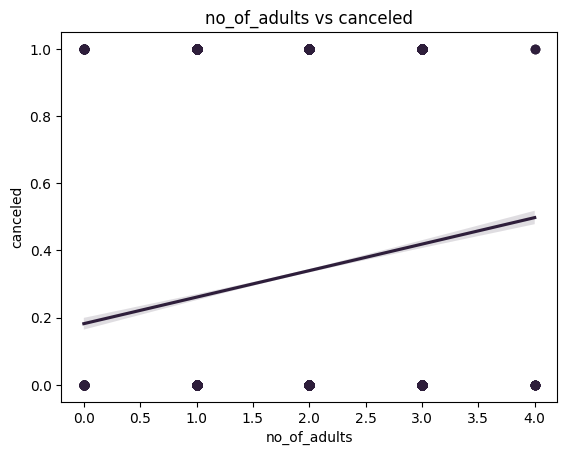

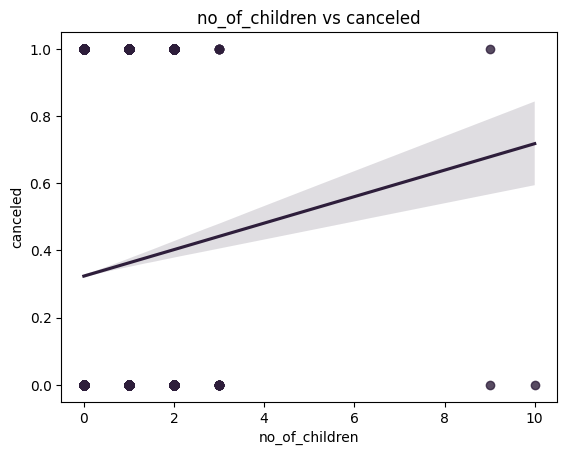

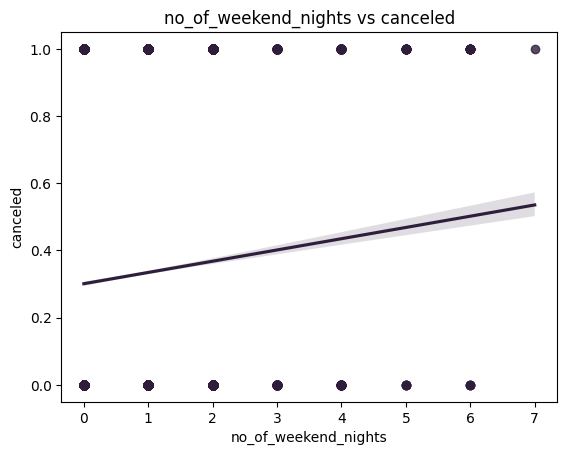

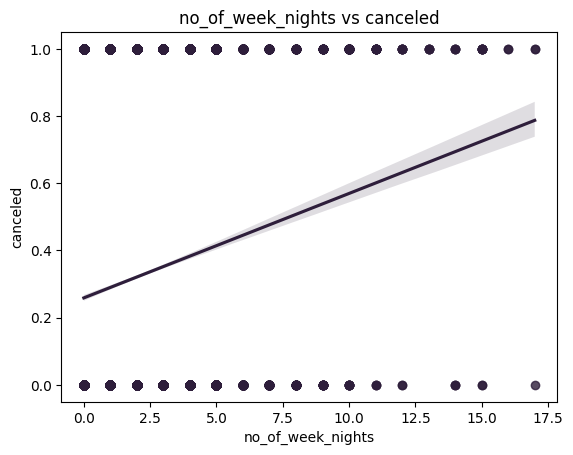

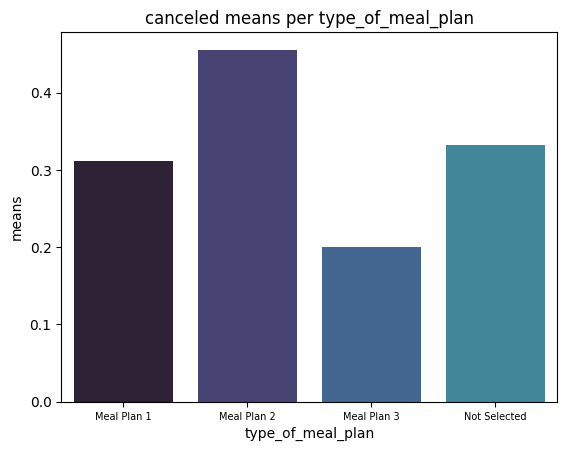

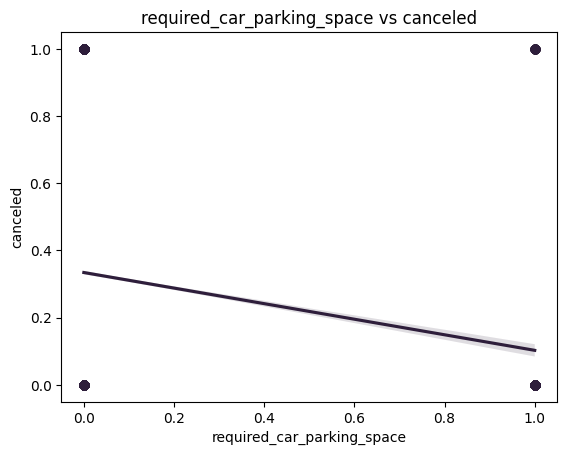

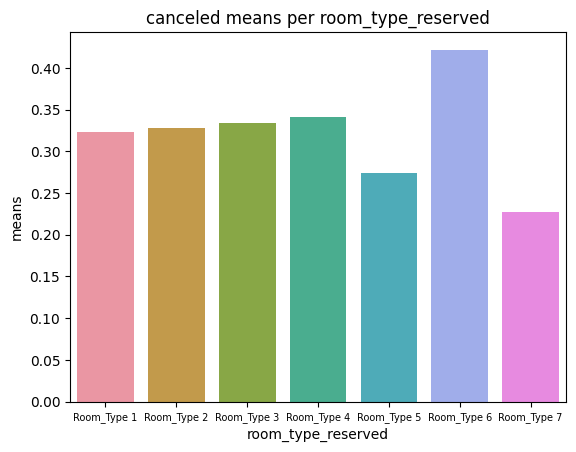

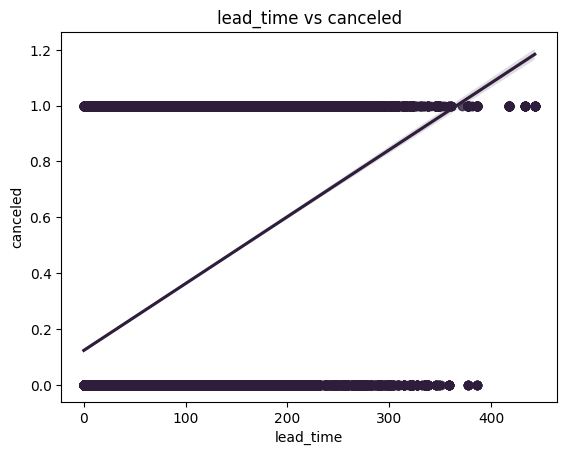

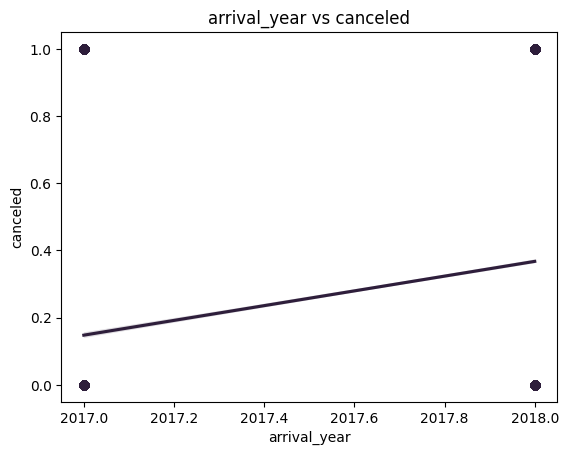

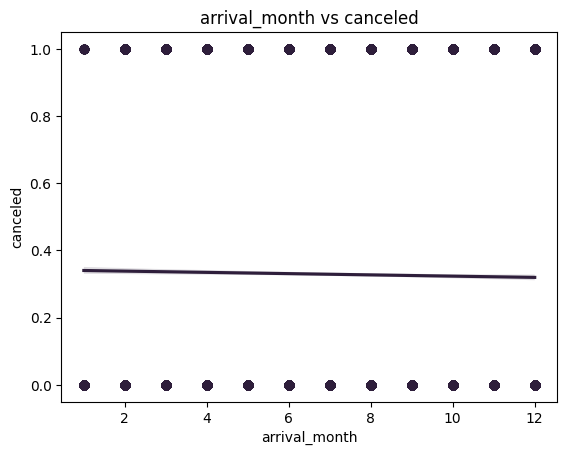

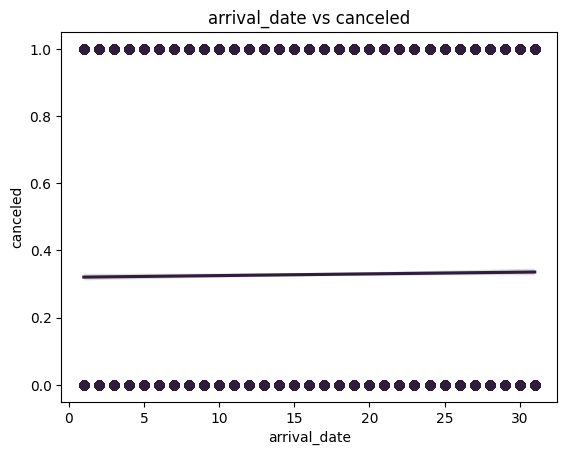

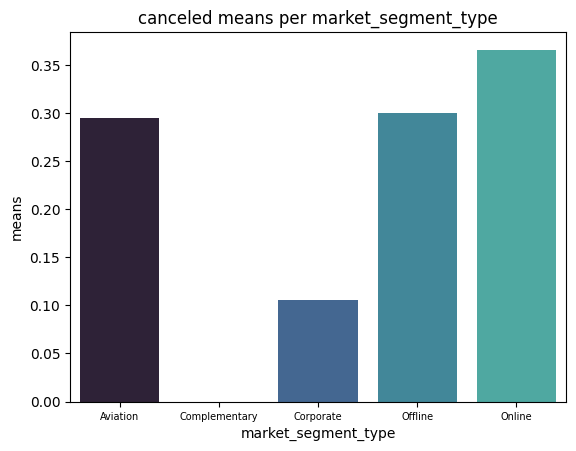

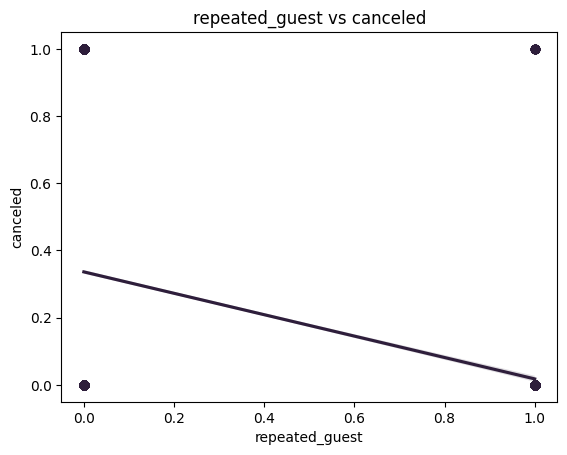

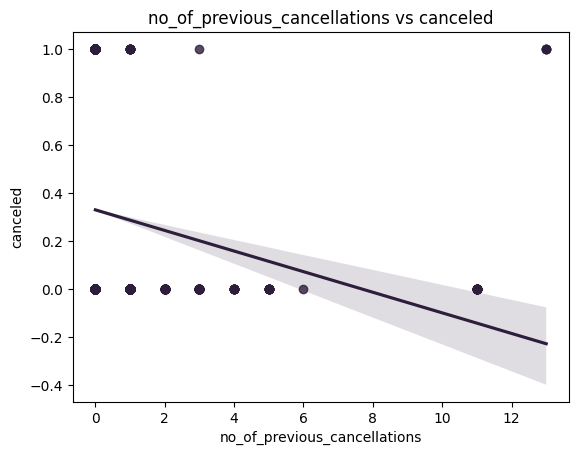

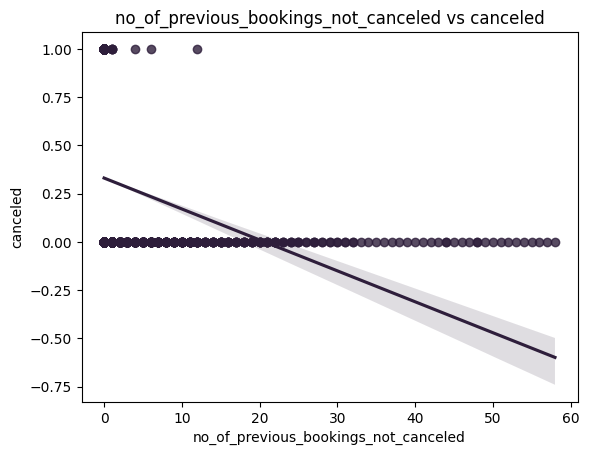

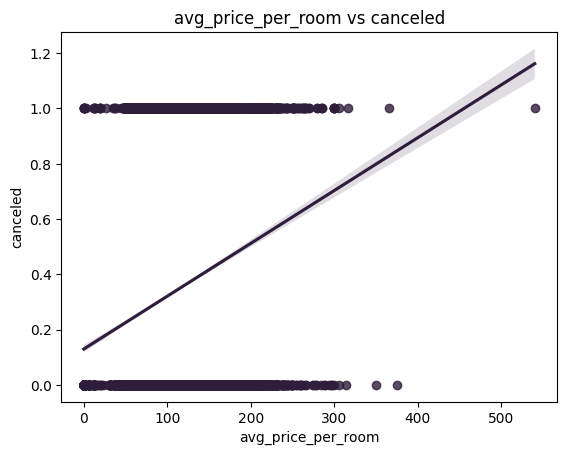

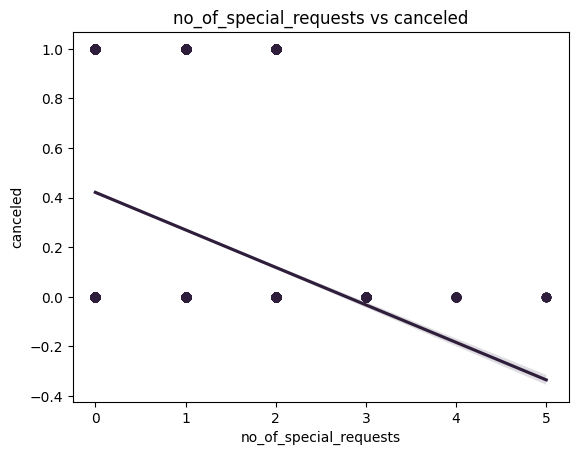

In [38]:
sns.set_palette('mako')

for col in hotels.columns:
    if hotels[col].dtype.name == 'category':
        grouped = hotels.groupby(col, as_index=False)['canceled'].agg({'means':np.mean})
        sns.barplot(x=col, y='means', data=grouped)
        plt.title('canceled means per {}'.format(col))
        plt.xticks(fontsize=7)
        plt.show()
        
    elif hotels[col].dtype.name == 'float64':
        sns.regplot(x=col, y='canceled', data=hotels)
        plt.title('{} vs canceled'.format(col))
        plt.show()

Observations:

- no_of_adults: higher number of adults tend to cancel more.
- no_of_children: higher number of children tend to cancel more.
- no_of_weekend_nights: higher number of weekend nights slightly cancel more.
- no_of_weeknights: higher number of weeknights cancel more.
- type_of_meal_plan: meal plan 2 has the highest cancel rate while meal plan 3 has the lowest.
- required_parking_space: those that require a parking space tend to cancel less.
- room_type_reserved: room type 6 has the highest cancel rate while room type 7 has the lowest.
- lead_time: higher lead time tend to cancel more.
- arrival_year: 2018 has a higher cancel rate compared to year 2017
- arrival_month: no significant differences.
- arrival_date: no significant differences.
- market_segment_type: online segment has the highest cancel rate while there are no cancels in complimentary.
- repeated_guest: repeated guests tend to cancel less.
- no_of_previous_cancelation: those with higher number of previous cancelation has a significant chance to not cancel.
- no_of_previous_bookings_not_canceled: higher number of previous bookings not canceled tend to not cancel
- avg_price_per_room: higher average price tend to have more cancels.
- no_of_special_requests: higher special requests tend to cancel less.

The columns arrival month, and arrival date will be dropped since there is no significant differences between their values. Since these are date values, it is also decided to drop arrival year since the dates seem to have weak trends. However, it is recommended to extract features by combining these columns to produce a date and identify if there is a factor on that date which could influence booking cancelation such as holidays or storms. Unfortunately, this is not explored because there is no information about the location of the hotel.

Since using two features that are highly correlated in a model is redundant, a correlation heatmap would help in deciding if there are droppable features.

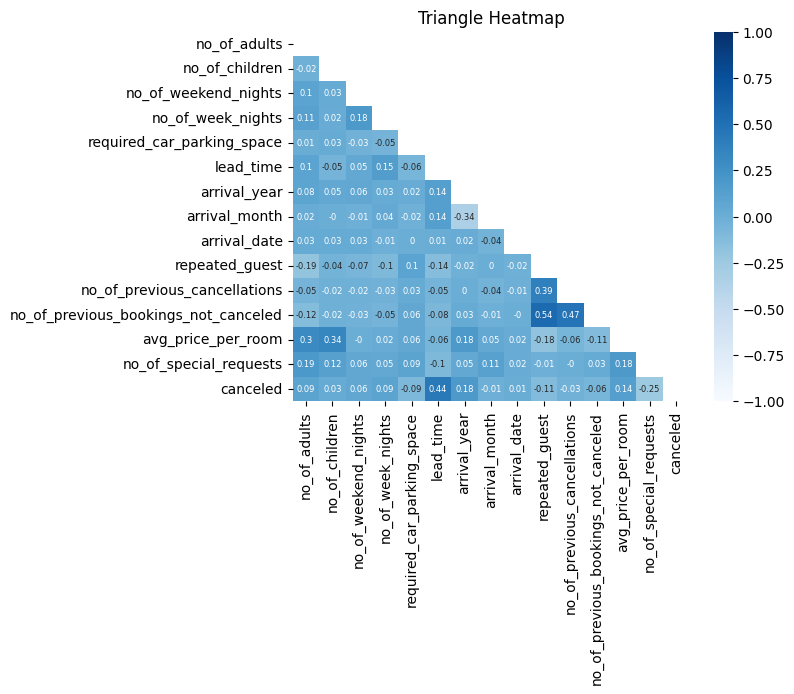

In [39]:
mask = np.triu(np.ones_like(hotels.corr(), dtype=bool))
sns.heatmap(hotels.corr().round(2), mask=mask, vmax=1, vmin=-1, annot=True, cmap='Blues', annot_kws={'fontsize':6})
plt.title('Triangle Heatmap')
plt.show()

Since there are no very strong correlation between featrues, no features will be dropped due to correlation.

### 3. Feature Selection and Null Imputation

As mentioned in the last chapter, the columns arrival year, arrival month and arrival date will be dropped. Observations that are mostly null values will also be dropped using a threshold of 80 percent since there will be too many assumptions for these observations.

Since there are a lot of null values, different visualizations are used to identify if there are trends in the nulls. A matrix, heatmap, and dendrogram is used for the visualization.

In [40]:
hotels.drop(['arrival_year', 'arrival_month', 'arrival_date'], axis=1, inplace=True)

In [41]:
percentage = 80
min_count = ((100-percentage) / 100) * (hotels.shape[1] + 1)
hotels = hotels.dropna(axis=0, thresh=min_count)

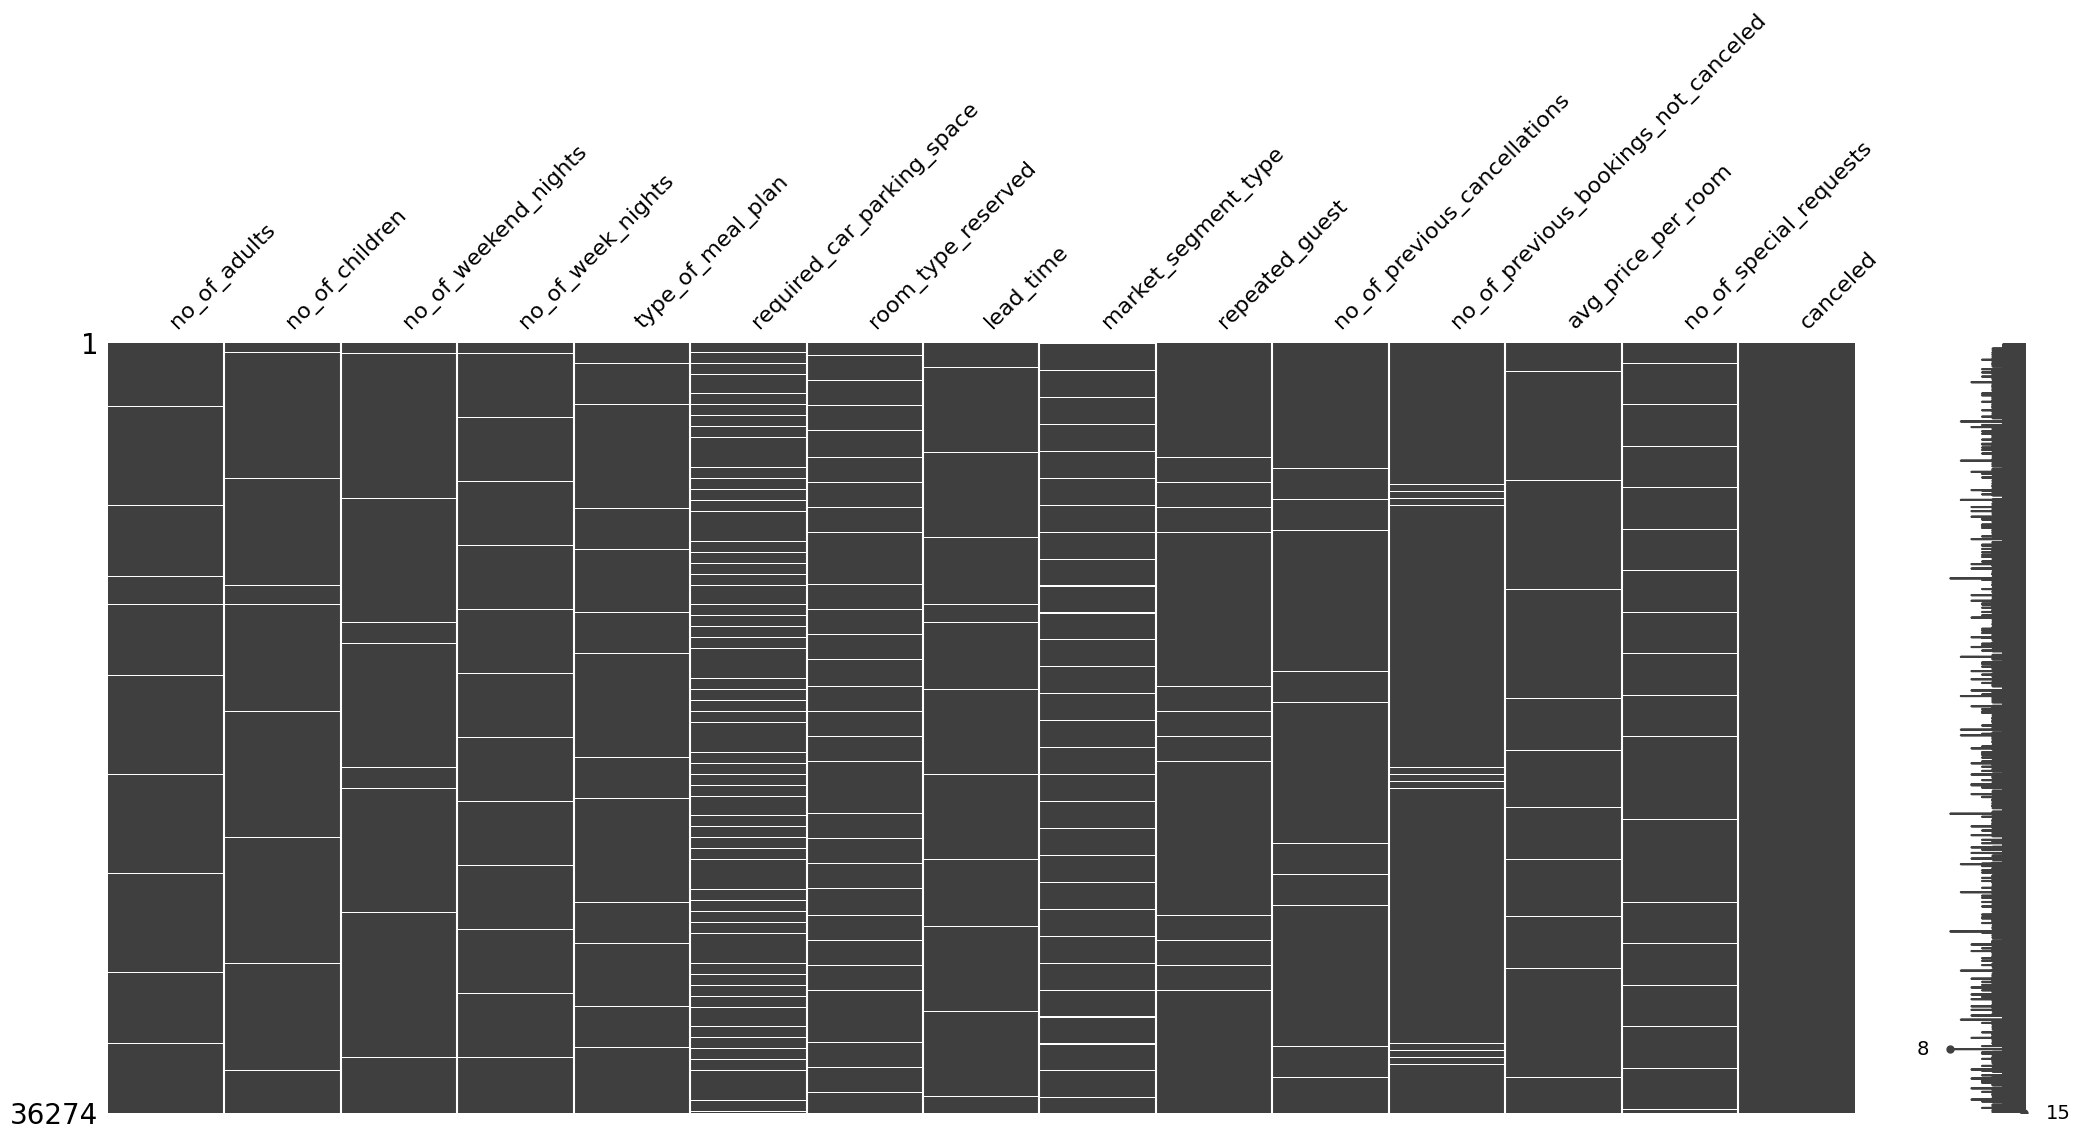

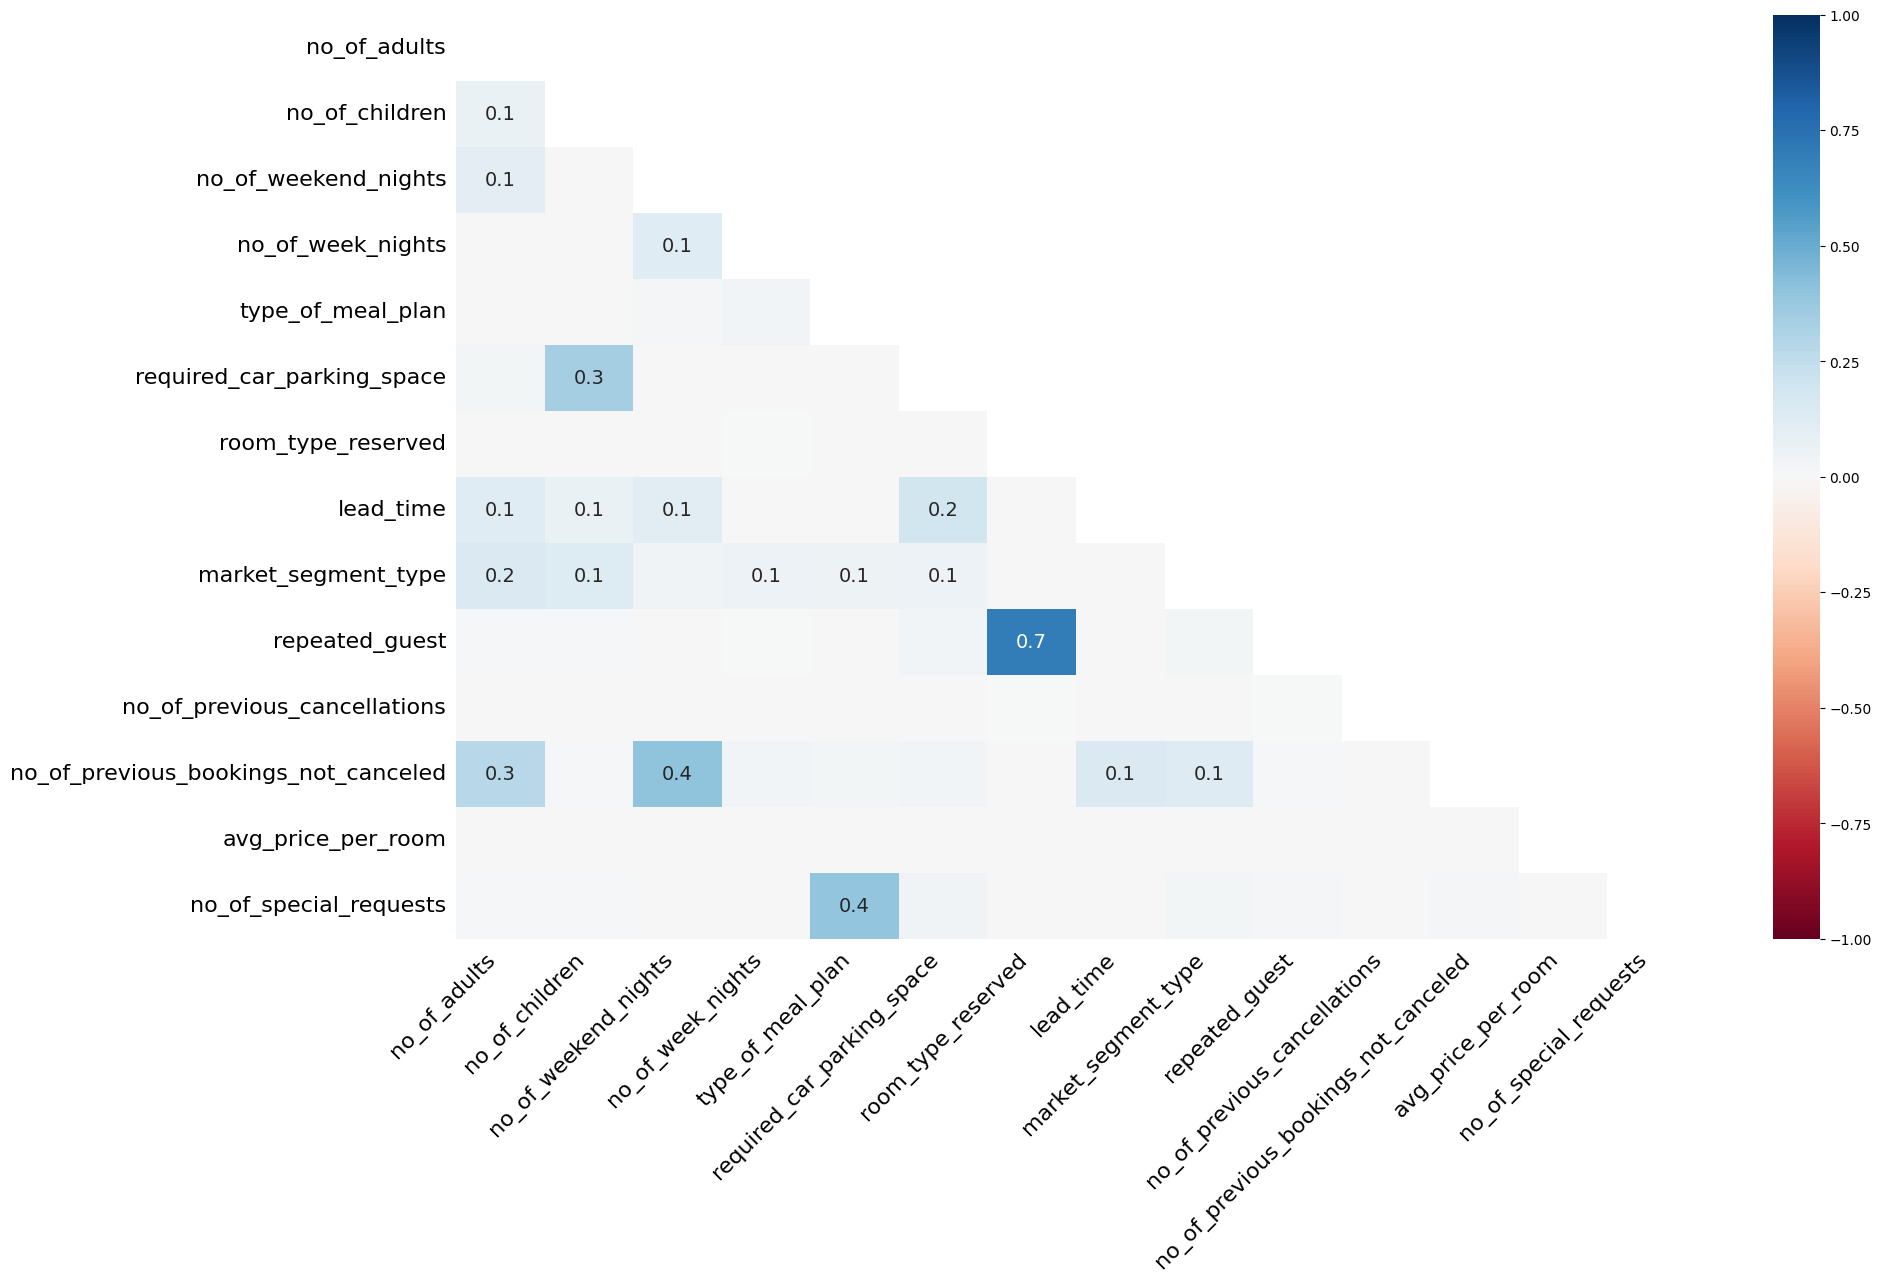

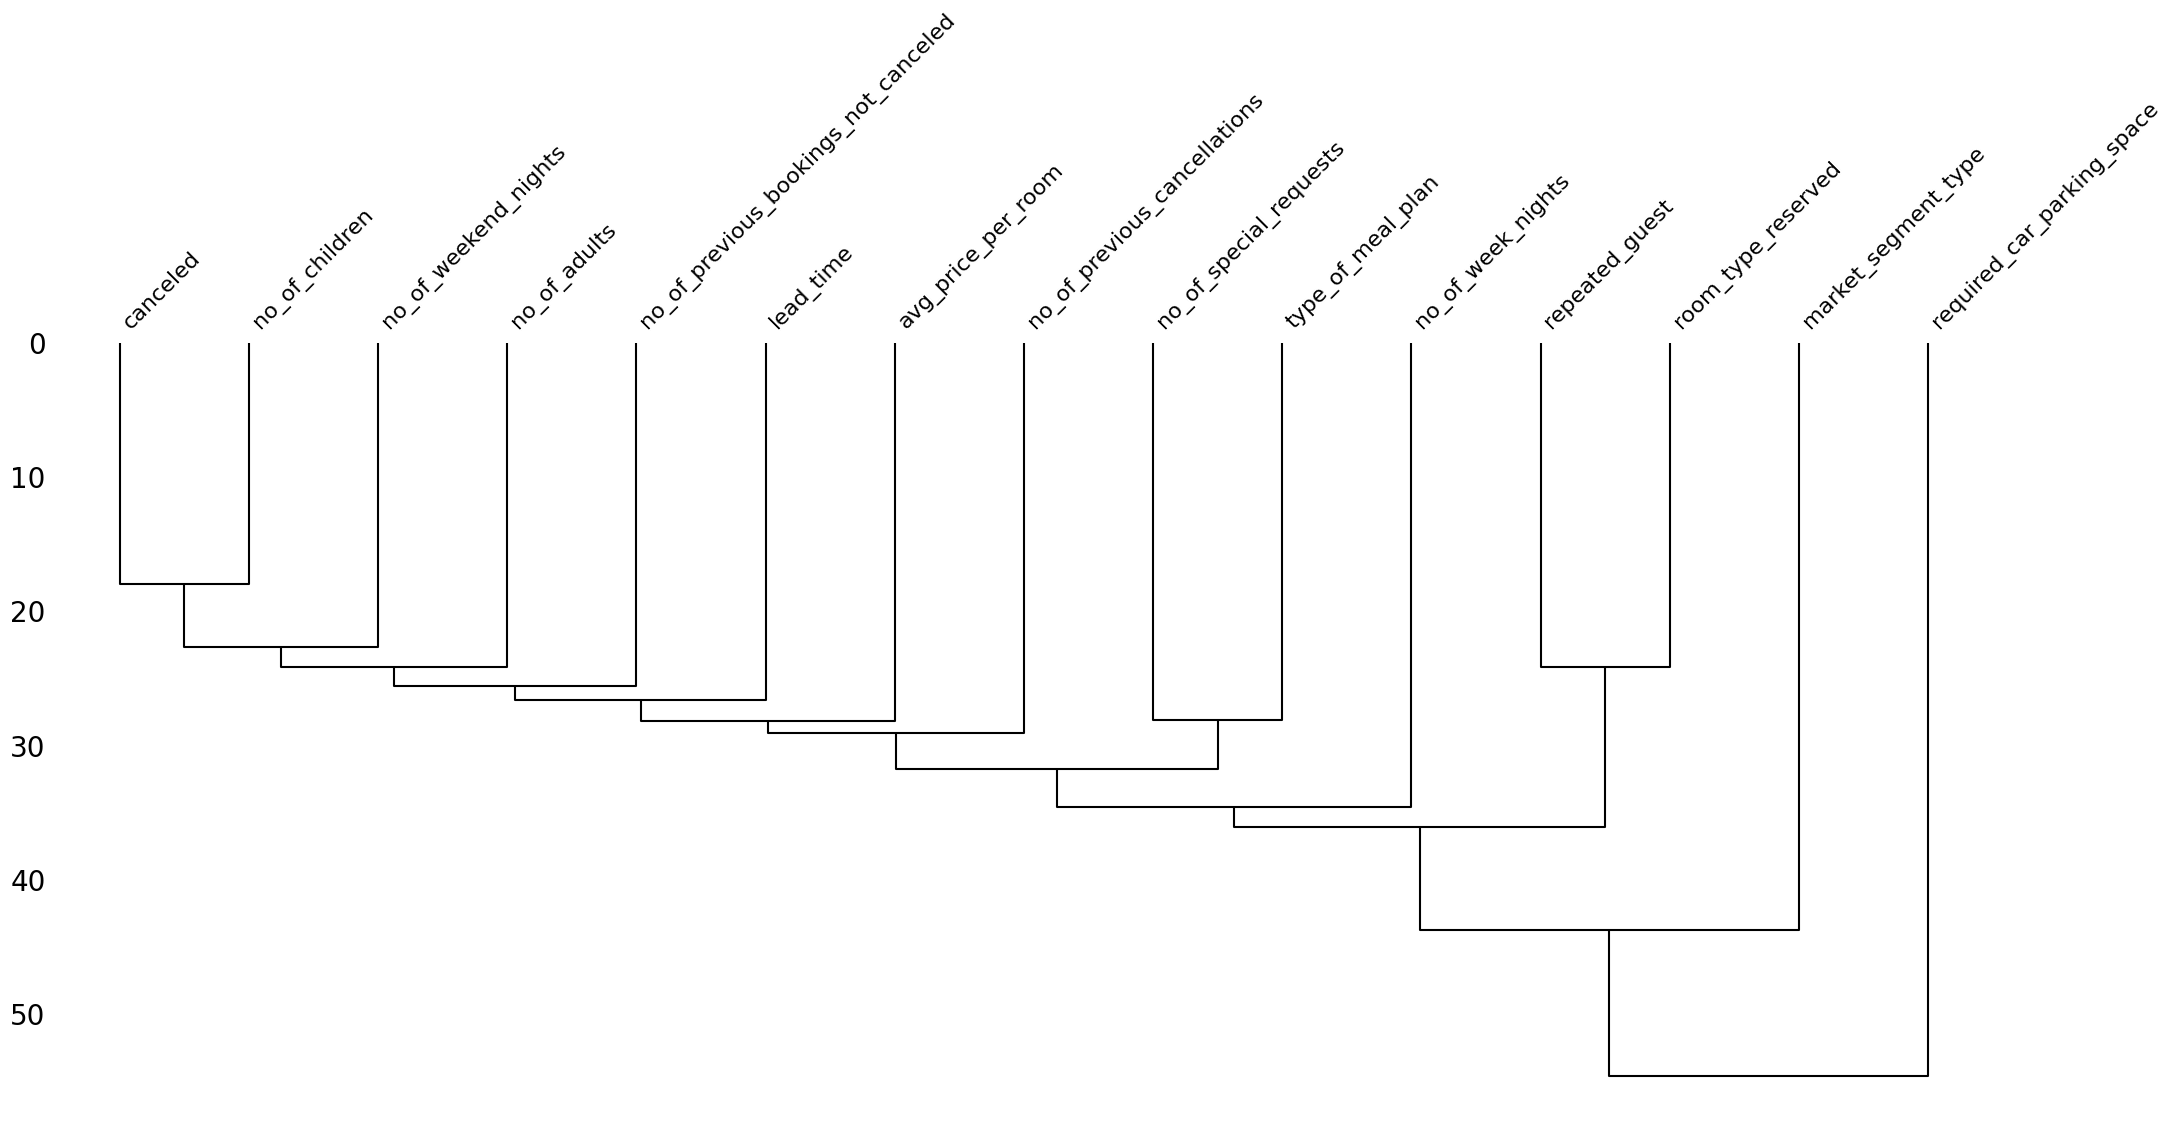

In [42]:
import missingno as msno

msno.matrix(hotels)
plt.show()

msno.heatmap(hotels)
plt.show()

msno.dendrogram(hotels)
plt.show()

In [43]:
for col in hotels.columns:
    print(hotels[col].value_counts())

2.0    25813
1.0     7606
3.0     2290
0.0      137
4.0       16
Name: no_of_adults, dtype: int64
0.0     33275
1.0      1605
2.0      1049
3.0        19
9.0         2
10.0        1
Name: no_of_children, dtype: int64
0.0    16715
1.0     9888
2.0     8970
3.0      152
4.0      128
5.0       34
6.0       20
7.0        1
Name: no_of_weekend_nights, dtype: int64
2.0     11191
1.0      9295
3.0      7660
4.0      2914
0.0      2327
5.0      1584
6.0       184
7.0       109
8.0        61
10.0       58
9.0        32
11.0       17
15.0       10
12.0        9
14.0        7
13.0        5
17.0        3
16.0        2
Name: no_of_week_nights, dtype: int64
Meal Plan 1     27421
Not Selected     5057
Meal Plan 2      3266
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
0.0    32649
1.0     1034
Name: required_car_parking_space, dtype: int64
Room_Type 1    27234
Room_Type 4     5851
Room_Type 6      939
Room_Type 2      664
Room_Type 5      256
Room_Type 7      154
Room_Type 3        6
Na

There is a high correlation between the nulls of room type reserved and repeated guests. An explanation might be repeated guests knows what room type they want for the hotel and assuming null values are not repeated guests, they won't specifically select a room which would result in a null value.

The initial plan was to use MICE when imputing values, unfortunately importing fancy impute in datacamp workspace causes an error. Hence, single imputation by the most logical value of a column is performed in the dataset. Since there is also a chance for single imputation dataset perform worse than dropped nulls, a copy of the dataset with dropped nulls is saved. The imputation summary is listed below:

- no_of_adults: 1
- no_of_children: 0
- no_of_weekend_nights: 0
- no_of_weeknights: 1
- type_of_meal_plan: Meal Plan 1
- required_parking_space: 0
- room_type_reserved: Room_Type 1
- lead_time: 0
- market_segment_type: Online
- repeated_guest: 0
- no_of_previous_cancelation: 0
- no_of_previous_bookings_not_canceled: 0
- avg_price_per_room: Median price
- no_of_special_requests: 0

For the number of adults, even though the column mode is 2, it was more likely to use 1 as the default value. For the weekend nights and week nights, since there are nulls in week nights with 0 weekend nights, it seems logical to use 1 for week nights and 0 for week end nights because the length of stay should be at least 1 day. For the rest of the column, 0 or the mode or median is imputed depending on the type of the column.

A matrix is used to check if all nulls are imputed.

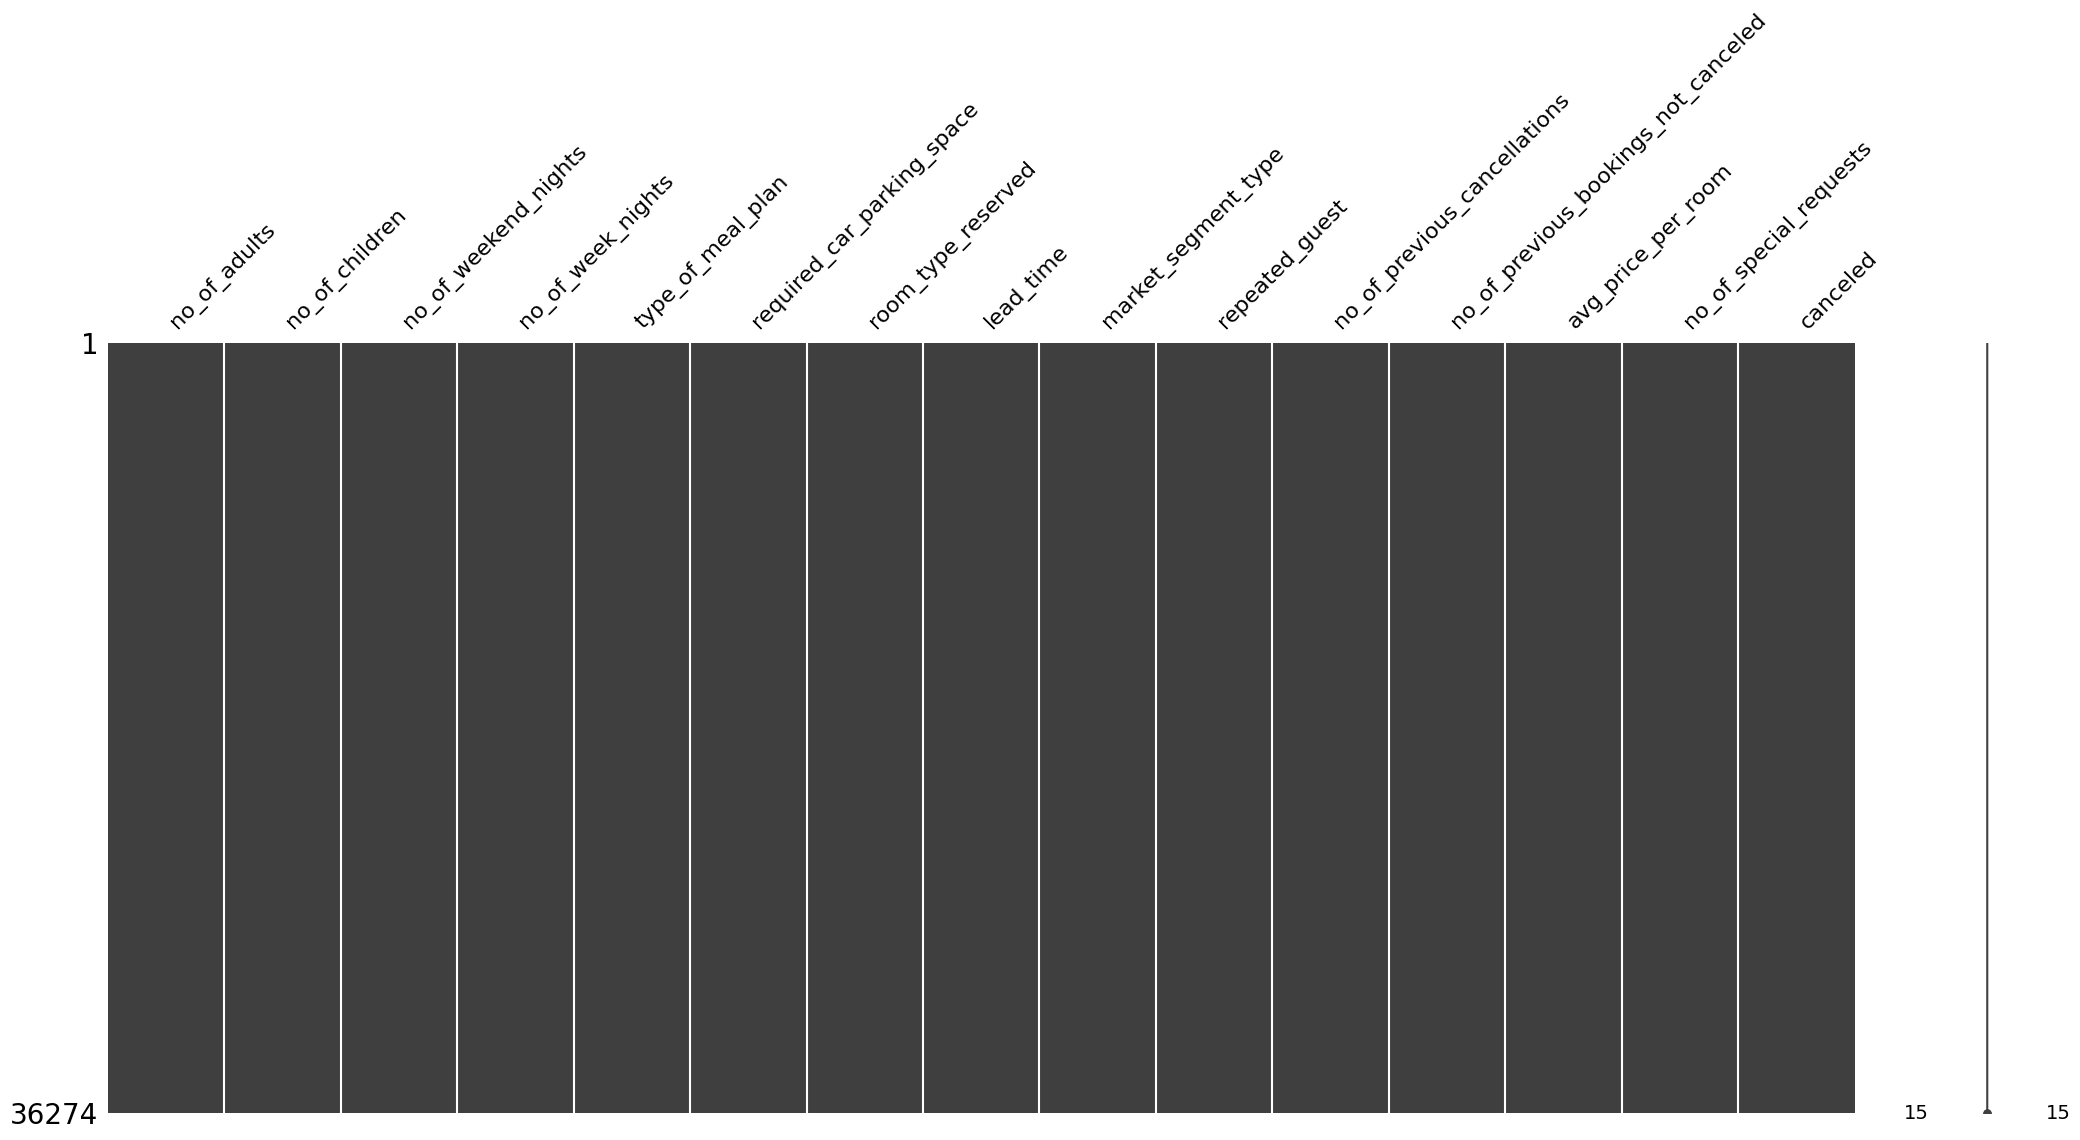

In [44]:
hotels_dropped = hotels.copy(deep=True)
hotels_dropped.dropna(inplace=True)

hotels['no_of_adults'] = hotels['no_of_adults'].fillna(1)
hotels['no_of_children'] = hotels['no_of_children'].fillna(0)
hotels['no_of_weekend_nights'] = hotels['no_of_weekend_nights'].fillna(0)
hotels['no_of_week_nights'] = hotels['no_of_week_nights'].fillna(1)
hotels['type_of_meal_plan'] = hotels['type_of_meal_plan'].fillna('Meal Plan 1')
hotels['required_car_parking_space'] = hotels['required_car_parking_space'].fillna(0)
hotels['room_type_reserved'] = hotels['room_type_reserved'].fillna('Room_Type 1')
hotels['lead_time'] = hotels['lead_time'].fillna(0)
hotels['market_segment_type'] = hotels['market_segment_type'].fillna('Online')
hotels['repeated_guest'] = hotels['repeated_guest'].fillna(0)
hotels['no_of_previous_cancellations'] = hotels['no_of_previous_cancellations'].fillna(0)
hotels['no_of_previous_bookings_not_canceled'] = hotels['no_of_previous_bookings_not_canceled'].fillna(0)
hotels['avg_price_per_room'] = hotels['avg_price_per_room'].fillna(hotels['avg_price_per_room'].median())
hotels['no_of_special_requests'] = hotels['no_of_special_requests'].fillna(0)

msno.matrix(hotels)
plt.show()

### 4. Machine Learning

Three models are used for machine learning: KNN, logistic regression, and random forest classifier. All of these models are baseline models. The imputed dataset is used. The accuracy score and confusion matrix of each model is shown below.

KNN accuracy score: 0.8424147753376826


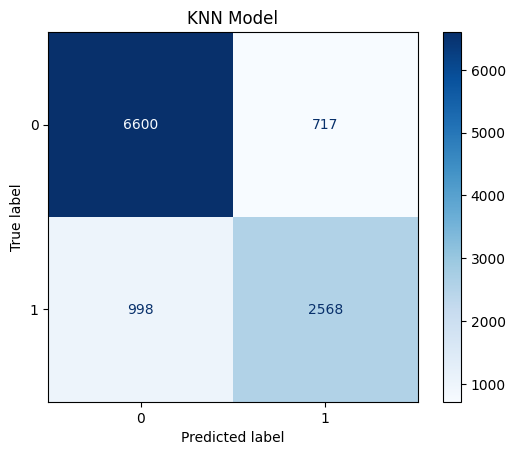


 

Logistic Regression accuracy score: 0.7958283561517964


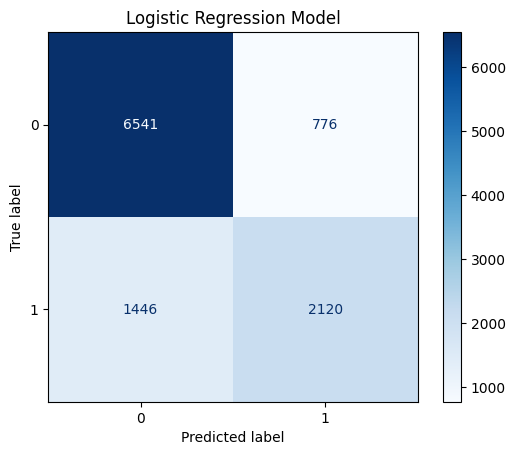


 

Random Forest Classifier accuracy score: 0.8741155931268951


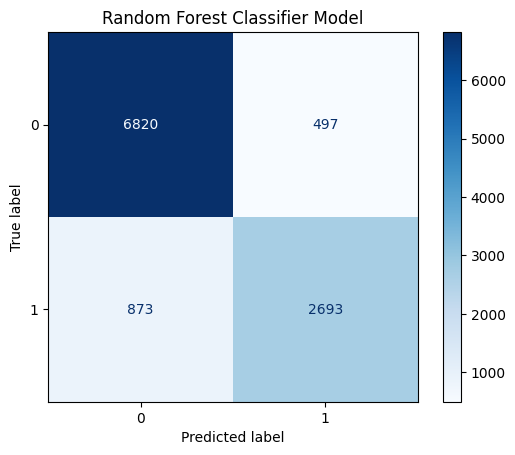

In [45]:
seed = 123

X = hotels.drop('canceled', axis=1).copy()
y = hotels['canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

num_sel = make_column_selector(dtype_exclude='category')
cat_sel = make_column_selector(dtype_include='category')
num_cols = num_sel(X)
cat_cols = cat_sel(X)

preprocessor = ColumnTransformer([
    ('StandardScaler', StandardScaler(), num_cols),
    ('OneHotEncoder', OneHotEncoder(), cat_cols)
])

KNN = KNeighborsClassifier()
LR = LogisticRegression()
RFC = RandomForestClassifier()

knn_pipe = make_pipeline(preprocessor, KNN)
reg_pipe = make_pipeline(preprocessor, LR)
for_pipe = make_pipeline(preprocessor, RFC)

pipes = {'KNN':knn_pipe, 'Logistic Regression':reg_pipe, 'Random Forest Classifier':for_pipe}

for model, pipe in pipes.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
     
    score = accuracy_score(y_test, y_pred)
    print('{} accuracy score: {}'.format(model, score))    
        
    cm = confusion_matrix(y_test,y_pred,labels=pipe.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_)
    disp.plot(cmap='Blues')
    plt.title('{} Model'.format(model))
    plt.show()  
    print('\n \n')

Using the dataset with dropped nulls, the models perform slightly better. It seems that the dataset is still large enough to give relevant information for the model to use.

In [46]:
Xd = hotels_dropped.drop('canceled', axis=1).copy()
yd = hotels_dropped['canceled']

Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.3, random_state=seed, stratify=yd)

for model, pipe in pipes.items():
    pipe.fit(Xd_train, yd_train)
    yd_pred = pipe.predict(Xd_test)
    score = accuracy_score(yd_test, yd_pred)
    print('{} accuracy score: {}'.format(model, score))

KNN accuracy score: 0.844811320754717
Logistic Regression accuracy score: 0.7979952830188679
Random Forest Classifier accuracy score: 0.8784198113207548


### 5. Model Feature Analysis

Since the Random Forest Classifier has the highest accuracy score, the feature importances of this model is extracted to evaluate which features contributes the most when predicting if a booking will be canceled or not. The top 5 feature are plotted since these are the most significant features and the effect of the rest is negligible by how the model is trained. The model using the dropped nulls datset is also used to see if there is a difference.

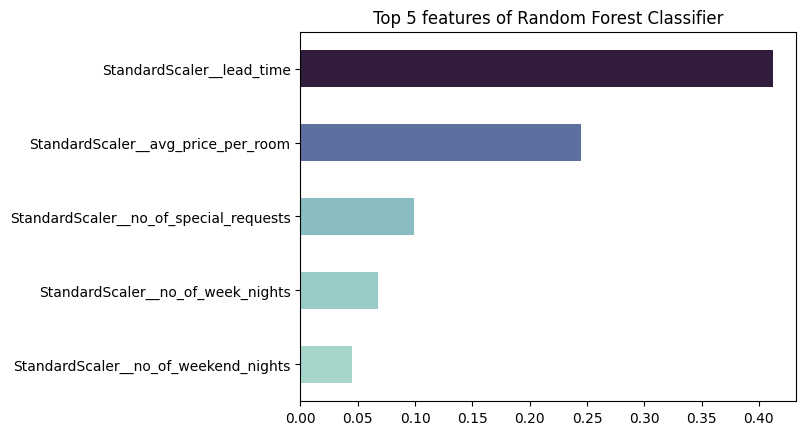

Top 5 features from RFC model using dropped nulls dataset:

StandardScaler__lead_time                 0.415994
StandardScaler__avg_price_per_room        0.233960
StandardScaler__no_of_special_requests    0.104584
StandardScaler__no_of_week_nights         0.066658
StandardScaler__no_of_weekend_nights      0.044100
dtype: float64


In [47]:
selected_model = for_pipe
selected_model.fit(X_train, y_train)
X_features = preprocessor.fit(X_train).get_feature_names_out()
feature_importances = RFC.feature_importances_
rfc_importances = pd.Series(feature_importances, index=X_features).sort_values()
rfc_top_5 = rfc_importances[-5:]

palette = sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=True)
rfc_top_5.plot.barh(color=palette(rfc_top_5/float(rfc_top_5.max())))
plt.title('Top 5 features of Random Forest Classifier')
plt.show()

selected_model.fit(Xd_train, yd_train)
Xd_features = preprocessor.fit(Xd_train).get_feature_names_out()
feature_importances_d = RFC.feature_importances_
rfc_d_importances = pd.Series(feature_importances_d, index=Xd_features).sort_values(ascending=False)
rfc_d_top_5 = rfc_d_importances[:5]
print('Top 5 features from RFC model using dropped nulls dataset:\n\n{}'.format(rfc_d_top_5))

There is no difference on both models in their top 5 features. Possible explanations of the features:

1. Lead time: Bookings with higher lead time has a higher probability that a booking will be canceled. This can be explained by the booker finding an alternative that suits their needs better due to factors such as location and price.
2. Average price per room: It is logical to think that people would prefer a more affordable priced hotel, which is why bookings on higher priced rooms tend to be canceled more.
3. Number of special requests: Bookings with higher special requests tend to be canceled less probably because the booking becomes more unique for each special request and it is more difficult to find alternatives that caters the same requests.
4. Number of week nights: 
5. Number of weekend nights: Number of week nights and weekend nights can be translated to length of stay. A probable explanation is that the length of stay is correlated with the total expenses. Hence, those that has a higher length of stay would have the tendency to find better alternatives.